In [ ]:
#Brain Age Estimation Using IXI Data

In [ ]:
#Uploading, reviewing, and matching Excel and MRI data.


In [1]:
import pandas as pd

# import CSV file
df = pd.read_csv("IXI_Edit.csv")

# General information about the data
print("=== Excel Data General Information ===")
print(df.info())

# Show the first 5 lines
print("\n=== Fİrst 5 lines ===")
print(df.head())


=== Excel Data General Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IXI_ID            619 non-null    int64  
 1   SEX_ID            619 non-null    int64  
 2   HEIGHT            619 non-null    int64  
 3   WEIGHT            619 non-null    int64  
 4   ETHNIC_ID         619 non-null    int64  
 5   MARITAL_ID        619 non-null    int64  
 6   OCCUPATION_ID     619 non-null    int64  
 7   QUALIFICATION_ID  619 non-null    int64  
 8   DOB               616 non-null    object 
 9   DATE_AVAILABLE    619 non-null    int64  
 10  STUDY_DATE        593 non-null    object 
 11  AGE               590 non-null    float64
dtypes: float64(1), int64(9), object(2)
memory usage: 58.2+ KB
None

=== Fİrst 5 lines ===
   IXI_ID  SEX_ID  HEIGHT  WEIGHT  ETHNIC_ID  MARITAL_ID  OCCUPATION_ID  \
0       1       1     170      8

In [2]:
print("\n=== Incomplete Data Analysis ===")
missing_summary = []

for col in df.columns:
    missing_count = df[col].isna().sum()
    missing_pct = 100 * missing_count / len(df)
    missing_summary.append({
        "Column": col,
        "Missing_Count": missing_count,
        "Missing_Percentage": round(missing_pct, 2)
    })

missing_df = pd.DataFrame(missing_summary)
print(missing_df)



=== Incomplete Data Analysis ===
              Column  Missing_Count  Missing_Percentage
0             IXI_ID              0                0.00
1             SEX_ID              0                0.00
2             HEIGHT              0                0.00
3             WEIGHT              0                0.00
4          ETHNIC_ID              0                0.00
5         MARITAL_ID              0                0.00
6      OCCUPATION_ID              0                0.00
7   QUALIFICATION_ID              0                0.00
8                DOB              3                0.48
9     DATE_AVAILABLE              0                0.00
10        STUDY_DATE             26                4.20
11               AGE             29                4.68


In [3]:
# There are no missing values in the SEX_ID and IXI_ID column, but there are 29 missing values in the age column.

In [4]:
print("\n=== Data Types ===")
print(df.dtypes)


=== Data Types ===
IXI_ID                int64
SEX_ID                int64
HEIGHT                int64
WEIGHT                int64
ETHNIC_ID             int64
MARITAL_ID            int64
OCCUPATION_ID         int64
QUALIFICATION_ID      int64
DOB                  object
DATE_AVAILABLE        int64
STUDY_DATE           object
AGE                 float64
dtype: object


In [5]:
print(df.columns.tolist())


['IXI_ID', 'SEX_ID', 'HEIGHT', 'WEIGHT', 'ETHNIC_ID', 'MARITAL_ID', 'OCCUPATION_ID', 'QUALIFICATION_ID', 'DOB', 'DATE_AVAILABLE', 'STUDY_DATE', 'AGE']


In [6]:
print(df['IXI_ID'].duplicated().any())

True


In [7]:
df['STUDY_DATE'] = pd.to_datetime(df['STUDY_DATE'])
df_son = df.sort_values('STUDY_DATE').groupby('IXI_ID').last().reset_index()[['IXI_ID', 'AGE']]
df_son.to_csv('IXI_Age.csv', index=False)

In [8]:
print("\n=== The First 5 Lines of the New CSV ===")
df_son = pd.read_csv('IXI_Age.csv')
print(df_son.head())


=== The First 5 Lines of the New CSV ===
   IXI_ID    AGE
0       1    NaN
1       2  35.80
2      12  38.78
3      13  46.71
4      14  34.24


In [9]:
print(df_son.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IXI_ID  593 non-null    int64  
 1   AGE     565 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.4 KB
None


In [10]:
df_clean = df_son.dropna(subset=['AGE'])
df_clean.to_csv('IXI_Age_Clean.csv', index=False)
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 1 to 592
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IXI_ID  565 non-null    int64  
 1   AGE     565 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 13.2 KB
None


In [11]:
#Exploratory Analysis of T1-Weighted Structural MRI Data


In [13]:
import nibabel as nib
img = nib.load("/home/fkarateke/IXI_data_backup/mwp1sub-IXI117_T1w.nii.gz")
data = img.get_fdata()

print("=== MRI General Information ===")
print(f"Shape: {data.shape}")
print(f"Data type: {data.dtype}")
print(f"Minimum value: {data.min()}")
print(f"Maximum value: {data.max()}")
print(f"Average: {data.mean():.4f}")
print(f"Total number of voxels: {data.size}")
print(f"\nHeader information:")
print(img.header)

=== MRI General Information ===
Shape: (113, 137, 113)
Data type: float64
Minimum value: 0.0
Maximum value: 1.0894211530685425
Average: 0.1025
Total number of voxels: 1749353

Header information:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 113 137 113   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.   1.5  1.5  1.5  0.   0.   0.   0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'CAT12.

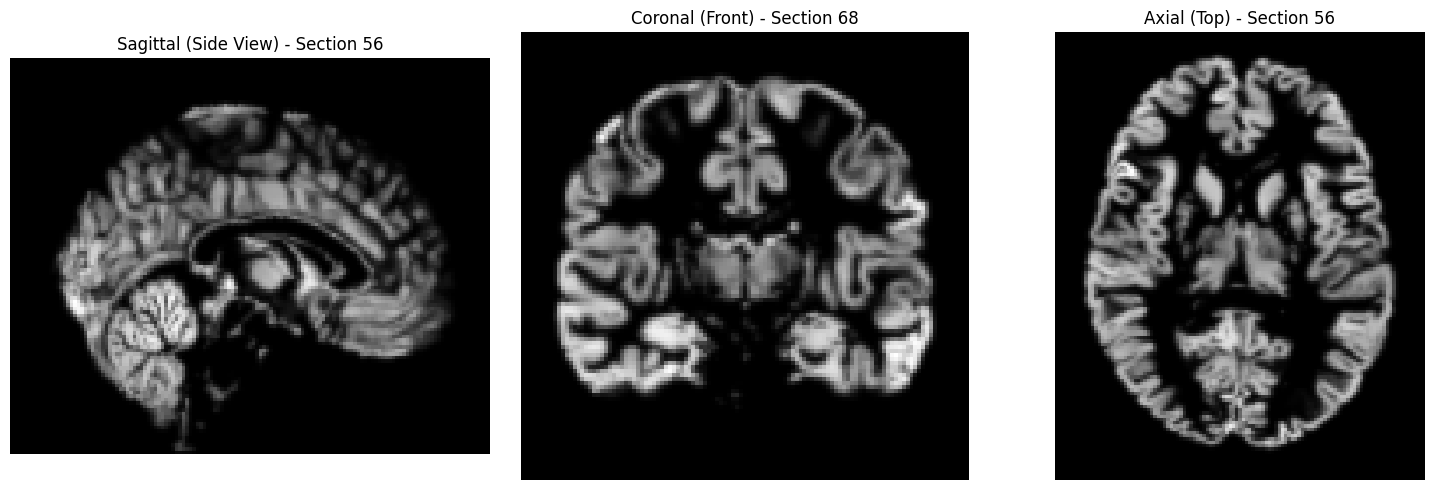


=== Observation Questions ===
1. Can you see the brain structure?
2. Where is the gray matter (light colored regions) concentrated?
3. Does the data appear usable?


In [14]:
import matplotlib.pyplot as plt
import numpy as np
# Let's get the middle sections
middle_x = data.shape[0] // 2 # Sagittal (side view)
middle_y = data.shape[1] // 2 # Coronal (front view)
middle_z = data.shape[2] // 2 # Axial (top view)

# Show 3 sections side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(data[middle_x, :, :].T, cmap='gray', origin='lower')
axes[0].set_title(f'Sagittal (Side View) - Section {middle_x}')
axes[0].axis('off')
axes[1].imshow(data[:, middle_y, :].T, cmap='gray', origin='lower')
axes[1].set_title(f'Coronal (Front) - Section {middle_y}')
axes[1].axis('off')
axes[2].imshow(data[:, :, middle_z].T, cmap='gray', origin='lower')
axes[2].set_title(f'Axial (Top) - Section {middle_z}')
axes[2].axis('off')
plt.tight_layout()
plt.show()

print("\n=== Observation Questions ===")
print("1. Can you see the brain structure?")
print("2. Where is the gray matter (light colored regions) concentrated?")
print("3. Does the data appear usable?")

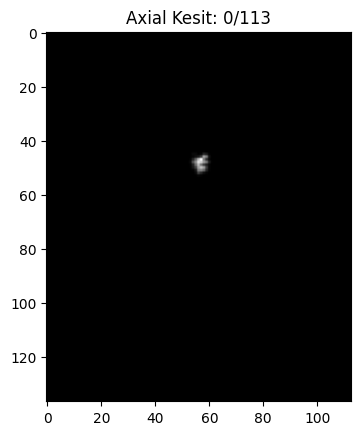

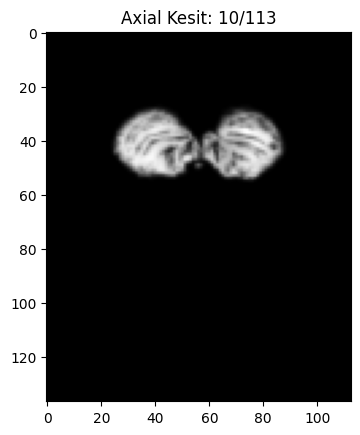

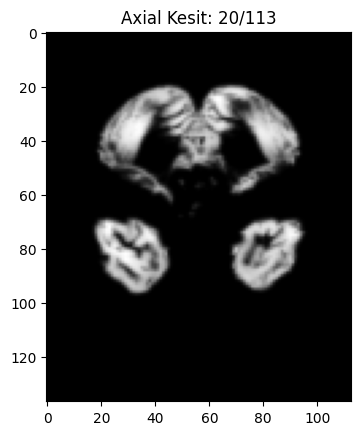

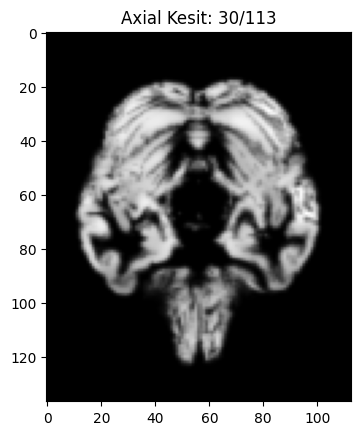

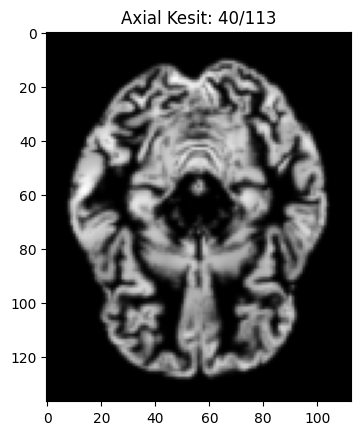

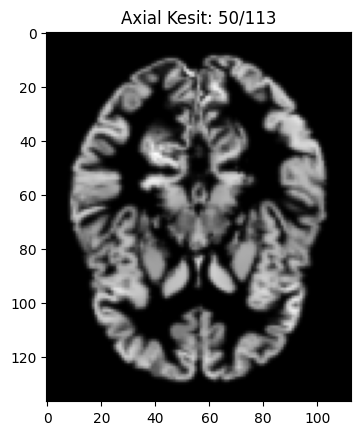

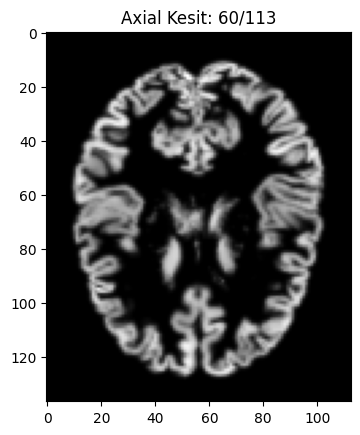

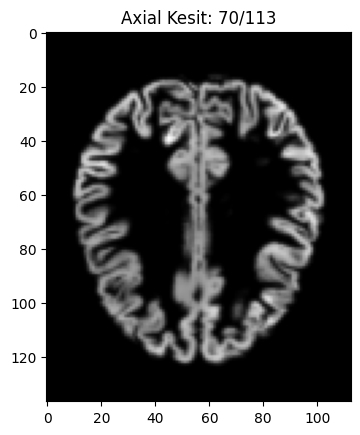

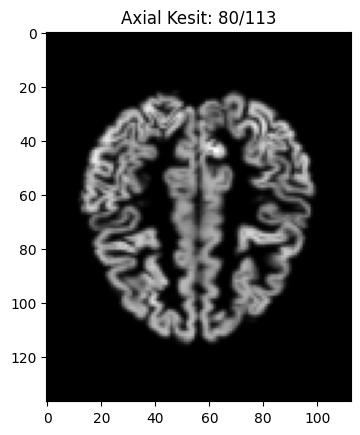

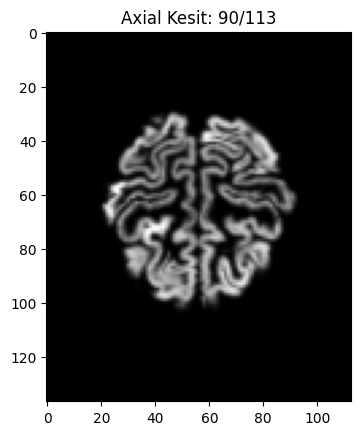

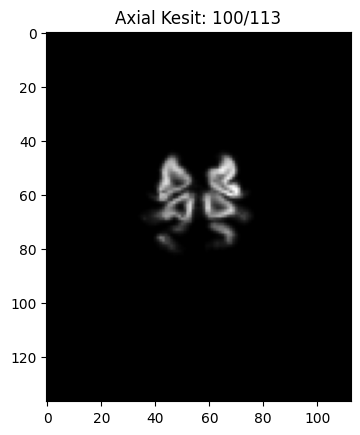

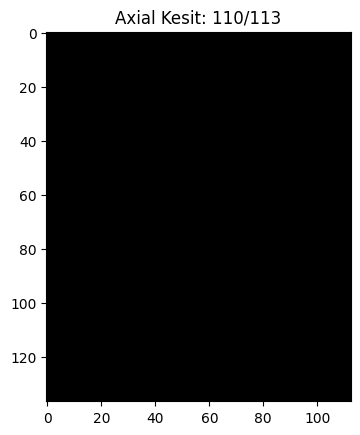

In [15]:
# Show axial sections one by one (passing through the brain)
for i in range(0, data.shape[2], 10):
    plt.imshow(data[:, :, i].T, cmap='gray')
    plt.title(f'Axial Kesit: {i}/{data.shape[2]}')
    plt.show()

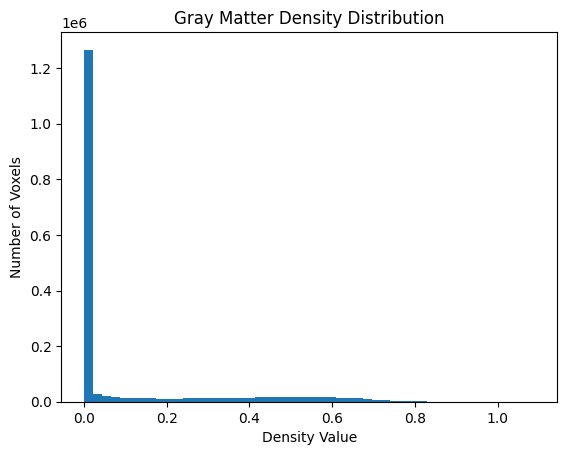

In [16]:
plt.hist(data.flatten(), bins=50)
plt.title('Gray Matter Density Distribution')
plt.xlabel('Density Value')
plt.ylabel('Number of Voxels')
plt.show()

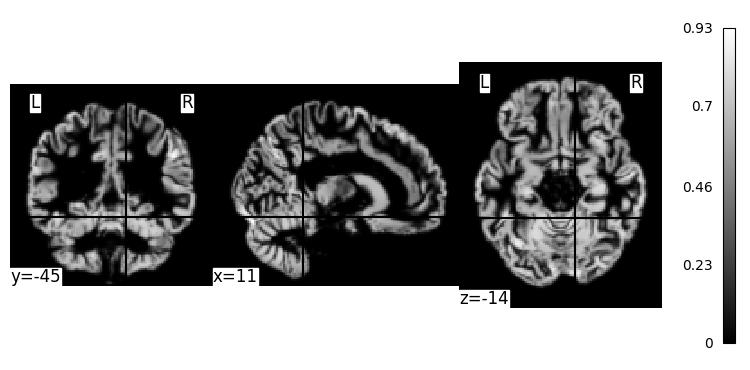

In [17]:
from nilearn import plotting

# Beautiful visualization in a single line
plotting.plot_img(img)
plotting.show()

In [18]:
import os
import glob

# Folder containing MRI files
mri_folder = "/home/fkarateke/IXI_data_backup/"

# Find all .nii.gz files
mri_files = sorted(glob.glob(os.path.join(mri_folder, "*.nii.gz")))

print(f"=== Total Number of MRI Files: {len(mri_files)} ===\n")

# Show the first 5 file names
print("First 5 files:")
for i, file in enumerate(mri_files[:5]):
  print(f"{i+1}. {os.path.basename(file)}")

# Last 5 files
print("\nLast 5 files:")
for i, file in enumerate(mri_files[-5:]):
  print(f"{len(mri_files)-4+i}. {os.path.basename(file)}")

=== Total Number of MRI Files: 581 ===

First 5 files:
1. mwp1sub-IXI002_T1w.nii.gz
2. mwp1sub-IXI012_T1w.nii.gz
3. mwp1sub-IXI013_T1w.nii.gz
4. mwp1sub-IXI014_T1w.nii.gz
5. mwp1sub-IXI015_T1w.nii.gz

Last 5 files:
577. mwp1sub-IXI651_T1w.nii.gz
578. mwp1sub-IXI652_T1w.nii.gz
579. mwp1sub-IXI653_T1w.nii.gz
580. mwp1sub-IXI661_T1w.nii.gz
581. mwp1sub-IXI662_T1w.nii.gz


In [19]:
# Extract IXI_IDs from MRI files
mri_ids = []
for file in mri_files:
    # "mwp1sub-IXI002_T1w.nii.gz" -> "IXI002" -> 2
    file_name = os.path.basename(file)
    ixi_id = int(file_name.split('-')[1].replace('IXI', '').split('_')[0])
    mri_ids.append(ixi_id)

print(f"Number of IXI_IDs in MRIs: {len(mri_ids)}")
print(f"Top 10 ID: {mri_ids[:10]}")

# Compare with IDs in CSV
csv_ids = set(df_clean['IXI_ID'].values)
mri_ids_set = set(mri_ids)

# Intersection: Those with both MRI and age data
common = csv_ids.intersection(mri_ids_set)

print(f"\n=== Match Analysis ===")
print(f"Those with age data in CSV: {len(csv_ids)}")
print(f"Those with MRI file: {len(mri_ids_set)}")
print(f"Those with both MRI and age: {len(common)} ")
print(f"\nOnly MRI, no age: {len(mri_ids_set - csv_ids)}")
print(f"Only age, no MRI: {len(csv_ids - mri_ids_set)}")

Number of IXI_IDs in MRIs: 581
Top 10 ID: [2, 12, 13, 14, 15, 16, 17, 19, 20, 21]

=== Match Analysis ===
Those with age data in CSV: 565
Those with MRI file: 581
Those with both MRI and age: 563 

Only MRI, no age: 18
Only age, no MRI: 2


In [20]:
# Convert Common IDs to DataFrame
common_list = sorted(list(common))
final_df = df_clean[df_clean['IXI_ID'].isin(common_list)].copy()  
final_df = final_df.sort_values('IXI_ID').reset_index(drop=True)

print(f"=== Final Data Set ===")
print(f"Total participants: {len(final_df)}")
print(f"\nAge Statistics:")
print(final_df['AGE'].describe())

# Save as CSV
final_df.to_csv('IXI_Final_563.csv', index=False)
print("\n 'IXI_Final_563.csv' saved")
print("\nFirst 5 rows:")
print(final_df.head())

=== Final Data Set ===
Total participants: 563

Age Statistics:
count    563.000000
mean      48.661297
std       16.477190
min       19.980000
25%       33.725000
50%       48.680000
75%       62.170000
max       86.320000
Name: AGE, dtype: float64

 'IXI_Final_563.csv' saved

First 5 rows:
   IXI_ID    AGE
0       2  35.80
1      12  38.78
2      13  46.71
3      14  34.24
4      15  24.28


In [21]:
import pandas as pd

# Upload CSV file
df = pd.read_csv("IXI_Final_563.csv")

# First few lines
print(df.head())

# Check columns
print(df.columns)

# Number of people
print(f"Total subjects: {len(df)}")

# Age distribution
print(df['AGE'].describe())

# Check for missing data
print(df.isna().sum())

   IXI_ID    AGE
0       2  35.80
1      12  38.78
2      13  46.71
3      14  34.24
4      15  24.28
Index(['IXI_ID', 'AGE'], dtype='object')
Total subjects: 563
count    563.000000
mean      48.661297
std       16.477190
min       19.980000
25%       33.725000
50%       48.680000
75%       62.170000
max       86.320000
Name: AGE, dtype: float64
IXI_ID    0
AGE       0
dtype: int64


In [22]:
import nibabel as nib
import numpy as np

print("=== MRI Size Check (First 10 files) ===\n")

# Check the first 10 files
shapes = []
for i, file in enumerate(mri_files[:10]):
    img = nib.load(file)
    data = img.get_fdata()
    shapes.append(data.shape)
    print(f"{i+1}. {os.path.basename(file)}: {data.shape}")

# Are they all the same?
if len(set(shapes)) == 1:
    print(f"\n The first 10 files are the same size: {shapes[0]}")
else:
    print(f"\n THERE ARE DIFFERENT SIZES: {set(shapes)}")


print("\n🔄  Checking all 563 files...")
all_shapes = []
for dosya in mri_files:
    img = nib.load(file)
    all_shapes.append(img.shape)

unique_shapes = set(all_shapes)
print(f" Number of unique sizes: {len(unique_shapes)}")
print(f"Sizes: {unique_shapes}")

=== MRI Size Check (First 10 files) ===

1. mwp1sub-IXI002_T1w.nii.gz: (113, 137, 113)
2. mwp1sub-IXI012_T1w.nii.gz: (113, 137, 113)
3. mwp1sub-IXI013_T1w.nii.gz: (113, 137, 113)
4. mwp1sub-IXI014_T1w.nii.gz: (113, 137, 113)
5. mwp1sub-IXI015_T1w.nii.gz: (113, 137, 113)
6. mwp1sub-IXI016_T1w.nii.gz: (113, 137, 113)
7. mwp1sub-IXI017_T1w.nii.gz: (113, 137, 113)
8. mwp1sub-IXI019_T1w.nii.gz: (113, 137, 113)
9. mwp1sub-IXI020_T1w.nii.gz: (113, 137, 113)
10. mwp1sub-IXI021_T1w.nii.gz: (113, 137, 113)

 The first 10 files are the same size: (113, 137, 113)

🔄  Checking all 563 files...
 Number of unique sizes: 1
Sizes: {(113, 137, 113)}


In [23]:
from nilearn import datasets
import nibabel as nib

# Schaefer 800-zone atlas
print("=== Downloading Schaefer 800 Atlas ===")
schaefer = datasets.fetch_atlas_schaefer_2018(n_rois=800, yeo_networks=7, resolution_mm=1)

print(f"Atlas path: {schaefer.maps}")
print(f"Number of regions: {len(schaefer.labels)}")
print(f"First 5 regions:")
for i in range(5):
    print(f"  {i+1}. {schaefer.labels[i]}")

# Check Atlas size
schaefer_img = nib.load(schaefer.maps)
print(f"\nSchaefer atlas size: {schaefer_img.shape}")
print(f"MRI size: {data.shape}")

=== Downloading Schaefer 800 Atlas ===
[fetch_atlas_schaefer_2018] Dataset found in /home/fkarateke/nilearn_data/schaefer_2018
Atlas path: /home/fkarateke/nilearn_data/schaefer_2018/Schaefer2018_800Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
Number of regions: 801
First 5 regions:
  1. Background
  2. 7Networks_LH_Vis_1
  3. 7Networks_LH_Vis_2
  4. 7Networks_LH_Vis_3
  5. 7Networks_LH_Vis_4

Schaefer atlas size: (182, 218, 182)
MRI size: (113, 137, 113)


In [24]:
from nilearn.image import resample_to_img
import nibabel as nib

print("=== Resampling Schaefer Atlas to MRI Resolution ===")

# Resample Schaefer atlas to 1.5mm MRI resolution
schaefer_resampled = resample_to_img(
    schaefer.maps,
    img,  # IXI117 MRI reference image
    interpolation='nearest'
)

print(f"Original Schaefer shape: {schaefer_img.shape}")
print(f"Resampled Schaefer shape: {schaefer_resampled.shape}")
print(f"MRI shape: {img.shape}")

if schaefer_resampled.shape == img.shape:
    print(" Schaefer atlas is ready!")
else:
    print(" Shape mismatch detected!")

# Save (optional)
nib.save(schaefer_resampled, 'schaefer_800_1.5mm.nii.gz')
print("Saved: schaefer_800_1.5mm.nii.gz")


=== Resampling Schaefer Atlas to MRI Resolution ===
Original Schaefer shape: (182, 218, 182)
Resampled Schaefer shape: (113, 137, 113)
MRI shape: (113, 137, 113)
 Schaefer atlas is ready!
Saved: schaefer_800_1.5mm.nii.gz


In [25]:
import nibabel as nib
import numpy as np

# Load the cerebellar atlas
cerebellar_path = "/home/fkarateke/atl-Anatom_space-MNI_dseg.nii"
cerebellar_img = nib.load(cerebellar_path)

print("=== Cerebellar Atlas (Diedrichsen 2009) ===")
print(f"Shape: {cerebellar_img.shape}")
print(f"Voxel size: {cerebellar_img.header.get_zooms()}")

# How many regions are there?
cerebellar_data = cerebellar_img.get_fdata()
unique_regions = np.unique(cerebellar_data)

print(f"Number of unique regions: {len(unique_regions) - 1}")  # excluding background (0)
print(f"Region IDs: {unique_regions}")


=== Cerebellar Atlas (Diedrichsen 2009) ===
Shape: (153, 103, 84)
Voxel size: (np.float32(1.0), np.float32(1.0), np.float32(1.0))
Number of unique regions: 34
Region IDs: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]


In [26]:
from nilearn.image import resample_to_img
import nibabel as nib

print("=== Resampling Cerebellar Atlas to 1.5mm MRI Resolution ===")

# Resample the cerebellar atlas to the MRI resolution
cerebellar_resampled = resample_to_img(
    cerebellar_img,
    img,  # IXI117 MRI reference image
    interpolation='nearest'
)

print(f"Original shape: {cerebellar_img.shape}")
print(f"Resampled shape: {cerebellar_resampled.shape}")
print(f"MRI shape: {img.shape}")

if cerebellar_resampled.shape == img.shape:
    print(" Shapes match!")

# Save the resampled atlas
nib.save(cerebellar_resampled, 'cerebellar_34_1.5mm.nii.gz')
print("Saved: cerebellar_34_1.5mm.nii.gz")


=== Resampling Cerebellar Atlas to 1.5mm MRI Resolution ===
Original shape: (153, 103, 84)
Resampled shape: (113, 137, 113)
MRI shape: (113, 137, 113)
 Shapes match!
Saved: cerebellar_34_1.5mm.nii.gz


In [27]:
import nibabel as nib
import numpy as np

# Load the Brainnetome atlas
brainnetome_path = "/home/fkarateke/BNA_MPM_thr25_1.25mm.nii.gz"
brainnetome_img = nib.load(brainnetome_path)

print("=== Brainnetome Atlas ===")
print(f"Shape: {brainnetome_img.shape}")
print(f"Voxel size: {brainnetome_img.header.get_zooms()}")

# How many regions are there?
brainnetome_data = brainnetome_img.get_fdata()
unique_regions = np.unique(brainnetome_data)

print(f"Number of unique regions: {len(unique_regions) - 1}")  # excluding background (0)
print(f"First 20 region IDs: {unique_regions[:20]}")


=== Brainnetome Atlas ===
Shape: (145, 173, 145)
Voxel size: (np.float32(1.25), np.float32(1.25), np.float32(1.25))
Number of unique regions: 246
First 20 region IDs: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


In [28]:
from nilearn.image import resample_to_img
import nibabel as nib

print("=== Resampling Brainnetome Atlas to 1.5mm MRI Resolution ===")

# Resample the Brainnetome atlas to the MRI resolution
brainnetome_resampled = resample_to_img(
    brainnetome_img,
    img,
    interpolation='nearest'
)

print(f"Original shape: {brainnetome_img.shape}")
print(f"Resampled shape: {brainnetome_resampled.shape}")
print(f"MRI shape: {img.shape}")

if brainnetome_resampled.shape == img.shape:
    print(" Shapes match!")

# Save the resampled atlas
nib.save(brainnetome_resampled, 'brainnetome_246_1.5mm.nii.gz')
print("Saved: brainnetome_246_1.5mm.nii.gz")


=== Resampling Brainnetome Atlas to 1.5mm MRI Resolution ===
Original shape: (145, 173, 145)
Resampled shape: (113, 137, 113)
MRI shape: (113, 137, 113)
 Shapes match!
Saved: brainnetome_246_1.5mm.nii.gz


In [29]:
# Filter subcortical regions (IDs 211–246)
brainnetome_resampled_data = brainnetome_resampled.get_fdata()

# Select voxels with IDs between 211 and 246
subcortical_mask = (
    (brainnetome_resampled_data >= 211) &
    (brainnetome_resampled_data <= 246)
)

# Remap IDs from 211–246 to 1–36
subcortical_data = np.where(
    subcortical_mask,
    brainnetome_resampled_data - 210,
    0
)

print("=== Subcortical Filtering ===")
print(f"Number of unique subcortical regions: {len(np.unique(subcortical_data)) - 1}")  # excluding background (0)
print(f"Region IDs: {np.unique(subcortical_data)}")

# Create and save the new atlas
subcortical_img = nib.Nifti1Image(
    subcortical_data.astype(np.int16),
    brainnetome_resampled.affine,
    brainnetome_resampled.header
)

nib.save(subcortical_img, 'brainnetome_subcortical_36_1.5mm.nii.gz')
print(" Subcortical atlas with 36 regions saved!")


=== Subcortical Filtering ===
Number of unique subcortical regions: 36
Region IDs: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36.]
 Subcortical atlas with 36 regions saved!


In [30]:
# Load the three atlases
schaefer_data = schaefer_resampled.get_fdata()
subcortical_data = nib.load('brainnetome_subcortical_36_1.5mm.nii.gz').get_fdata()
cerebellar_data = nib.load('cerebellar_34_1.5mm.nii.gz').get_fdata()

# Combine atlases (stack region IDs sequentially)
combined = np.zeros_like(schaefer_data)

combined[schaefer_data > 0] = schaefer_data[schaefer_data > 0]          # 1–800
combined[subcortical_data > 0] = subcortical_data[subcortical_data > 0] + 800  # 801–836
combined[cerebellar_data > 0] = cerebellar_data[cerebellar_data > 0] + 836     # 837–870

print(f"Number of unique regions in the combined atlas: {len(np.unique(combined)) - 1}")
print(f"Region ID range: {np.min(combined[combined > 0]):.0f} - {np.max(combined):.0f}")

# Save the combined atlas
combined_img = nib.Nifti1Image(
    combined.astype(np.int16),
    img.affine,
    img.header
)

nib.save(combined_img, 'combined_atlas_870_regions.nii.gz')
print("Combined atlas saved!")


Number of unique regions in the combined atlas: 870
Region ID range: 1 - 870
Combined atlas saved!


In [31]:
# Test feature extraction on a single MRI
print("=== Feature Extraction Test (IXI117) ===")

# Load MRI and combined atlas
mri_data = img.get_fdata()
atlas_data = combined

# Compute mean GMV for each region
features = []
for region_id in range(1, 871):  # 1–870
    mask = atlas_data == region_id
    if mask.sum() > 0:  # If the region exists
        region_mean = mri_data[mask].mean()
        features.append(region_mean)
    else:
        features.append(0)

print(f"Number of features: {len(features)}")

print(f"First 10 features: {features[:10]}")
print(f"Example feature value range: {min(features):.4f} - {max(features):.4f}")


=== Feature Extraction Test (IXI117) ===
Number of features: 870
First 10 features: [np.float64(0.5312430894936085), np.float64(0.6120694019642977), np.float64(0.633578196925632), np.float64(0.6744017482229273), np.float64(0.5005942285494056), np.float64(0.6157163423887994), np.float64(0.35233807571663717), np.float64(0.5480505477306583), np.float64(0.46736750178743247), np.float64(0.340497551413983)]
Example feature value range: 0.0317 - 0.7416


In [32]:
import pandas as pd
from tqdm import tqdm
import time
import nibabel as nib
import numpy as np

# Load CSV
df_final = pd.read_csv('IXI_Final_563.csv')

# Load combined atlas
atlas_data = combined

features_list = []
ages_list = []
ids_list = []

print("=== Starting Feature Extraction for 563 MRIs ===")
start_time = time.time()

for idx, row in tqdm(df_final.iterrows(), total=len(df_final)):
    ixi_id = int(row['IXI_ID'])  # convert from float to int
    age = row['AGE']
    
    # Path to MRI file
    mri_path = f"/home/fkarateke/IXI_data_backup/mwp1sub-IXI{ixi_id:03d}_T1w.nii.gz"
    
    try:
        # Load MRI
        mri_img = nib.load(mri_path)
        mri_data = mri_img.get_fdata()
        
        # Compute mean GMV for each region
        features = []
        for region_id in range(1, 871):
            mask = atlas_data == region_id
            if mask.sum() > 0:
                features.append(mri_data[mask].mean())
            else:
                features.append(0)
        
        features_list.append(features)
        ages_list.append(age)
        ids_list.append(ixi_id)
        
    except Exception as e:
        print(f"Error: IXI{ixi_id} - {e}")

# Convert to NumPy arrays
X = np.array(features_list)
y = np.array(ages_list)

elapsed = time.time() - start_time
print(f"\n Completed! Time elapsed: {elapsed/60:.1f} minutes")
print(f"Feature Matrix: {X.shape}")
print(f" Age Vector: {y.shape}")

# Save
np.save('X_features_870.npy', X)
np.save('y_ages.npy', y)
np.save('ids.npy', np.array(ids_list))
print(" Saved!")


=== Starting Feature Extraction for 563 MRIs ===


100%|█████████████████████████████████████████| 563/563 [21:13<00:00,  2.26s/it]


 Completed! Time elapsed: 21.2 minutes
Feature Matrix: (563, 870)
 Age Vector: (563,)
 Saved!


In [33]:
# Check loaded data
X = np.load('X_features_870.npy')
y = np.load('y_ages.npy')
ids = np.load('ids.npy')

print("=== Data Check ===")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"ids shape: {ids.shape}")

print(f"\nX value range: {X.min():.4f} - {X.max():.4f}")
print(f"X mean: {X.mean():.4f}")

print(f"\ny (age) range: {y.min():.2f} - {y.max():.2f}")
print(f"y mean: {y.mean():.2f}")

print(f"\nFirst 5 IDs: {ids[:5]}")
print(f"\nFirst subject's first 10 features: {X[0, :10]}")

# Check for NaN or Inf
print(f"\nAny NaN values? {np.isnan(X).any()}")
print(f"Any Inf values? {np.isinf(X).any()}")


=== Data Check ===
X shape: (563, 870)
y shape: (563,)
ids shape: (563,)

X value range: 0.0013 - 1.1036
X mean: 0.4095

y (age) range: 19.98 - 86.32
y mean: 48.66

First 5 IDs: [ 2 12 13 14 15]

First subject's first 10 features: [0.43098605 0.44917238 0.51711102 0.5031269  0.49115811 0.42239394
 0.4572417  0.45529245 0.3782559  0.42859705]

Any NaN values? False
Any Inf values? False


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr
import numpy as np

print("=== BASELINE MODEL: Regional Mean GMV + GLMnet ===\n")

# Load data
X = np.load('X_features_870.npy')
y = np.load('y_ages.npy')

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train: {X_train.shape[0]} subjects")
print(f"Test: {X_test.shape[0]} subjects\n")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ElasticNet with cross-validation (convergence adjusted)
print("Training GLMnet...")
model = ElasticNetCV(
    l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
    cv=5,
    random_state=42,
    max_iter=50000,  # Increased
    tol=0.001        # Tolerance added
)

model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r, _ = pearsonr(y_test, y_pred)
bias = pearsonr(y_test, y_test - y_pred)[0]

print("\n=== BASELINE PERFORMANCE ===")
print(f"MAE: {mae:.2f} years")
print(f"R²: {r2:.3f}")
print(f"Pearson's r: {r:.3f}")
print(f"Bias: {bias:.3f}")

print(f"\nBest alpha: {model.alpha_:.4f}")
print(f"Best l1_ratio: {model.l1_ratio_:.2f}")


=== BASELINE MODEL: Regional Mean GMV + GLMnet ===

Train: 450 subjects
Test: 113 subjects

Training GLMnet...

=== BASELINE PERFORMANCE ===
MAE: 6.82 years
R²: 0.728
Pearson's r: 0.853
Bias: 0.551

Best alpha: 0.4945
Best l1_ratio: 0.10


In [35]:
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler

print("=== L0 TEST: Single Region (Region 1) ===\n")

# Get voxels belonging to Region 1
region_id = 1
mask = (atlas_data == region_id)
n_voxels = mask.sum()

print(f"Number of voxels in Region {region_id}: {n_voxels}")

# Extract voxels of this region for each subject
X_region = []
for idx in range(len(ids)):
    ixi_id = int(ids[idx])
    mri_path = f"/home/fkarateke/IXI_data_backup/mwp1sub-IXI{ixi_id:03d}_T1w.nii.gz"
    mri_img = nib.load(mri_path)
    mri_data = mri_img.get_fdata()
    
    # Voxel values of this region (1D array)
    voxels = mri_data[mask]
    X_region.append(voxels)

X_region = np.array(X_region)  # (563, n_voxels)

print(f"X_region shape: {X_region.shape}")

# Out-of-sample predictions using 3-fold CV
kf = KFold(n_splits=3, shuffle=True, random_state=42)
region_preds = np.zeros(len(y))

for train_idx, val_idx in kf.split(X_region):
    X_tr, X_val = X_region[train_idx], X_region[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]
    
    # Standardization
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_val_scaled = scaler.transform(X_val)
    
    # GLMnet
    model = ElasticNetCV(l1_ratio=[.1, .5, .9, 1], cv=3, max_iter=5000, random_state=42)
    model.fit(X_tr_scaled, y_tr)
    
    # Out-of-sample predictions
    region_preds[val_idx] = model.predict(X_val_scaled)

# Correlation between Region 1 predictions and age
r, _ = pearsonr(y, region_preds)
mae = mean_absolute_error(y, region_preds)

print(f"\n=== Region 1 Performance ===")
print(f"MAE: {mae:.2f} years")
print(f"Pearson's r: {r:.3f}")
print(f"First 5 predictions: {region_preds[:5]}")


=== L0 TEST: Single Region (Region 1) ===

Number of voxels in Region 1: 762
X_region shape: (563, 762)


/home/fkarateke/thesis_env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.140e+00, tolerance: 6.079e+00
  model = cd_fast.enet_coordinate_descent(
/home/fkarateke/thesis_env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.710e+00, tolerance: 6.691e+00
  model = cd_fast.enet_coordinate_descent(
/home/fkarateke/thesis_env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis


=== Region 1 Performance ===
MAE: 10.95 years
Pearson's r: 0.601
First 5 predictions: [46.71676809 42.54777458 42.14723762 50.36530819 54.93235352]


In [36]:
import numpy as np
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import pickle
from tqdm import tqdm

# ---------------- Load region mean features ----------------
X = np.load('X_features_870.npy')  # shape = (n_subjects, n_regions)
y = np.load('y_ages.npy')          # shape = (n_subjects,)

n_regions = X.shape[1]
n_subjects = X.shape[0]

# ---------------- Prepare output ----------------
region_performance = []  # will store [region_id, MAE, Pearson r]

# 3-fold CV
kf = KFold(n_splits=3, shuffle=True, random_state=42)

print("=== Step 2: Region-level L0 candidate selection ===\n")

for region_id in tqdm(range(1, n_regions+1)):
    X_region = X[:, region_id-1].reshape(-1,1)  # single feature
    
    region_preds = np.zeros(n_subjects)
    
    for train_idx, val_idx in kf.split(X_region):
        X_tr, X_val = X_region[train_idx], X_region[val_idx]
        y_tr = y[train_idx]
        
        # Standardize
        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_val_scaled = scaler.transform(X_val)
        
        # ElasticNetCV with small CV (since feature is 1D)
        model = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.9, 1.0], cv=3, max_iter=5000)
        model.fit(X_tr_scaled, y_tr)
        
        # Predict
        region_preds[val_idx] = model.predict(X_val_scaled)
    
    # Metrics
    mae = mean_absolute_error(y, region_preds)
    r = np.corrcoef(y, region_preds)[0,1]
    
    region_performance.append([region_id, mae, r])

# ---------------- Save results ----------------
region_performance = np.array(region_performance)  # shape = (870,3)
np.save('region_level_performance.npy', region_performance)

# Optional: save as pickle for convenience
with open('region_level_performance.pkl', 'wb') as f:
    pickle.dump(region_performance, f)

print("\nRegion-level L0 candidate selection completed!")
print(f"Saved: region_level_performance.npy / .pkl")


=== Step 2: Region-level L0 candidate selection ===



100%|█████████████████████████████████████████| 870/870 [02:53<00:00,  5.01it/s]



Region-level L0 candidate selection completed!
Saved: region_level_performance.npy / .pkl


In [37]:
import numpy as np
import pickle

# ---------------- Load region-level performance ----------------
# perf: (870, 3) => columns: region_id, MAE, r
perf = np.load('region_level_performance.npy')  # or .pkl if saved with pickle

# ---------------- Candidate selection parameters ----------------
#  Minimum correlation
r_threshold = 0.2

#  Maximum MAE
mae_threshold = 12.0

# If no regions pass thresholds, select top n regions
n_best = 50

# ---------------- Apply thresholds ----------------
selected_regions = perf[(perf[:,2] >= r_threshold) & (perf[:,1] <= mae_threshold), 0].astype(int)

# ---------------- Fallback: pick top n_best by combined score ----------------
if len(selected_regions) == 0:
    # Combined score: higher r and lower MAE is better
    scores = perf[:,2] / perf[:,1]   # r / MAE
    selected_regions = perf[np.argsort(-scores)][:n_best,0].astype(int)
    print(f"No region passed thresholds. Selecting top {n_best} regions by r/MAE score.")
else:
    print(f"{len(selected_regions)} regions passed thresholds (r>={r_threshold}, MAE<={mae_threshold}).")

# ---------------- Example check ----------------
print("Example selected regions:", selected_regions[:10])

# ---------------- Save selected regions ----------------
np.save('selected_regions_L0.npy', selected_regions)
with open('selected_regions_L0.pkl', 'wb') as f:
    pickle.dump(selected_regions, f)

print("Selected regions saved! ")


177 regions passed thresholds (r>=0.2, MAE<=12.0).
Example selected regions: [ 3  4  8 53 68 70 73 76 78 79]
Selected regions saved! 


In [38]:
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from joblib import Parallel, delayed
from tqdm import tqdm
import time
import os

# ---------------- Load Data ----------------
selected_regions = np.load('selected_regions_L0.npy')
with open('region_voxel_data.pkl', 'rb') as f:
    region_data_dict = pickle.load(f)
y = np.load('y_ages.npy')
n_subjects = len(y)

# ---------------- Output ----------------
L0_voxel_preds = np.zeros((n_subjects, len(selected_regions)))

kf = KFold(n_splits=3, shuffle=True, random_state=42)

# ---------------- Function for one region ----------------
def process_region(idx, region_id, max_voxels=2000):
    X_region = region_data_dict[region_id]
    if X_region is None or X_region.shape[1] == 0:
        return np.zeros(n_subjects)
    
    # Subsample large voxel regions
    if X_region.shape[1] > max_voxels:
        vox_idx = np.random.choice(X_region.shape[1], max_voxels, replace=False)
        X_region = X_region[:, vox_idx]
    
    region_preds = np.zeros(n_subjects)
    
    for train_idx, val_idx in kf.split(X_region):
        X_tr, X_val = X_region[train_idx], X_region[val_idx]
        y_tr = y[train_idx]
        
        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_val_scaled = scaler.transform(X_val)
        
        model = ElasticNetCV(
            l1_ratio=[0.5, 0.9, 1.0],
            cv=3,
            max_iter=20000,
            tol=0.01,
            n_jobs=-1
        )
        model.fit(X_tr_scaled, y_tr)
        region_preds[val_idx] = model.predict(X_val_scaled)
    
    return region_preds

# ---------------- Parallel / Batch Processing with Progress ----------------
batch_size = 10  # her batch kaç region
n_jobs = 4       # worker sayısı

start_time = time.time()

for start in tqdm(range(0, len(selected_regions), batch_size), desc="Batches"):
    batch_regions = selected_regions[start:start+batch_size]
    
    # tqdm ile region ilerlemesini göstermek için nested list
    results = Parallel(n_jobs=n_jobs, verbose=10)(
        delayed(process_region)(i, rid) for i, rid in enumerate(batch_regions)
    )
    
    # Kaydet ve ilerleme barı
    for idx, region_preds in enumerate(results):
        L0_voxel_preds[:, start + idx] = region_preds
    
    # Kısmi kaydetme: her batch sonrası
    np.save('L0_voxel_predictions_partial.npy', L0_voxel_preds)
    with open('L0_voxel_predictions_partial.pkl', 'wb') as f:
        pickle.dump(L0_voxel_preds, f)
    
    elapsed = (time.time() - start_time)/60
    print(f"Batch {start//batch_size+1}/{(len(selected_regions)//batch_size)+1} done. Elapsed: {elapsed:.1f} min")

# ---------------- Final Save ----------------
np.save('L0_voxel_predictions.npy', L0_voxel_preds)
with open('L0_voxel_predictions.pkl', 'wb') as f:
    pickle.dump(L0_voxel_preds, f)

# ---------------- Quick Performance ----------------
mae_list = []
r_list = []
for i in range(len(selected_regions)):
    pred = L0_voxel_preds[:, i]
    mae_list.append(mean_absolute_error(y, pred))
    r_list.append(np.corrcoef(y, pred)[0,1])

print("Done! Example MAE / r for first 5 regions:")
for i in range(5):
    print(f"Region {selected_regions[i]} - MAE: {mae_list[i]:.2f}, r: {r_list[i]:.3f}")


Batches:   0%|                                           | 0/18 [00:00<?, ?it/s][Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   17.1s remaining:   17.1s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   23.1s remaining:    9.9s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   28.5s finished
Batches:   6%|█▉                                 | 1/18 [00:28<08:11, 28.92s/it]

Batch 1/18 done. Elapsed: 0.5 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   16.4s remaining:   16.4s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   22.1s remaining:    9.5s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   27.3s finished
Batches:  11%|███▉                               | 2/18 [00:56<07:30, 28.14s/it]

Batch 2/18 done. Elapsed: 0.9 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   20.3s remaining:   20.3s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   26.0s remaining:   11.1s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   36.1s finished
Batches:  17%|█████▊                             | 3/18 [01:33<07:59, 31.96s/it]

Batch 3/18 done. Elapsed: 1.6 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   14.1s remaining:   14.1s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   22.1s remaining:    9.5s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   30.2s finished
Batches:  22%|███████▊                           | 4/18 [02:03<07:19, 31.40s/it]

Batch 4/18 done. Elapsed: 2.1 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   17.7s remaining:   17.7s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   22.0s remaining:    9.4s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   31.2s finished
Batches:  28%|█████████▋                         | 5/18 [02:35<06:49, 31.48s/it]

Batch 5/18 done. Elapsed: 2.6 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   18.3s remaining:   18.3s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   23.0s remaining:    9.9s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   31.6s finished
Batches:  33%|███████████▋                       | 6/18 [03:07<06:19, 31.64s/it]

Batch 6/18 done. Elapsed: 3.1 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   20.6s remaining:   20.6s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   24.4s remaining:   10.4s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   33.5s finished
Batches:  39%|█████████████▌                     | 7/18 [03:40<05:55, 32.36s/it]

Batch 7/18 done. Elapsed: 3.7 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   21.1s remaining:   21.1s
/home/fkarateke/thesis_env/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   25.4s remaining:   10.9s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   34.1s finished
Batches:  44%|███████████████▌                   | 8/18 [04:15<05:30, 33.03s/it]

Batch 8/18 done. Elapsed: 4.3 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   18.0s remaining:   18.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   26.9s remaining:   11.5s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   34.3s finished
Batches:  50%|█████████████████▌                 | 9/18 [04:50<05:01, 33.52s/it]

Batch 9/18 done. Elapsed: 4.8 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   16.9s remaining:   16.9s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   21.7s remaining:    9.3s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   29.8s finished
Batches:  56%|██████████████████▉               | 10/18 [05:20<04:20, 32.52s/it]

Batch 10/18 done. Elapsed: 5.3 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   11.5s remaining:   11.5s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   14.3s remaining:    6.1s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   17.1s finished
Batches:  61%|████████████████████▊             | 11/18 [05:37<03:15, 27.91s/it]

Batch 11/18 done. Elapsed: 5.6 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   15.9s remaining:   15.9s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   17.9s remaining:    7.7s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   26.4s finished
Batches:  67%|██████████████████████▋           | 12/18 [06:04<02:45, 27.55s/it]

Batch 12/18 done. Elapsed: 6.1 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   17.9s remaining:   17.9s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   27.8s remaining:   11.9s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   35.7s finished
Batches:  72%|████████████████████████▌         | 13/18 [06:40<02:30, 30.16s/it]

Batch 13/18 done. Elapsed: 6.7 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   17.4s remaining:   17.4s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   22.6s remaining:    9.7s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   30.5s finished
Batches:  78%|██████████████████████████▍       | 14/18 [07:11<02:01, 30.40s/it]

Batch 14/18 done. Elapsed: 7.2 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   19.6s remaining:   19.6s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   23.9s remaining:   10.2s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   33.1s finished
Batches:  83%|████████████████████████████▎     | 15/18 [07:45<01:33, 31.31s/it]

Batch 15/18 done. Elapsed: 7.8 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   23.0s remaining:   23.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   28.4s remaining:   12.2s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   37.8s finished
Batches:  89%|██████████████████████████████▏   | 16/18 [08:23<01:06, 33.35s/it]

Batch 16/18 done. Elapsed: 8.4 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   17.6s remaining:   17.6s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   26.3s remaining:   11.3s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   34.7s finished
Batches:  94%|████████████████████████████████  | 17/18 [08:58<00:33, 33.85s/it]

Batch 17/18 done. Elapsed: 9.0 min


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done   2 out of   7 | elapsed:    8.1s remaining:   20.4s
[Parallel(n_jobs=4)]: Done   3 out of   7 | elapsed:    9.9s remaining:   13.1s
[Parallel(n_jobs=4)]: Done   4 out of   7 | elapsed:   17.7s remaining:   13.3s
[Parallel(n_jobs=4)]: Done   5 out of   7 | elapsed:  1.9min remaining:   45.4s
[Parallel(n_jobs=4)]: Done   7 out of   7 | elapsed:  2.6min finished
Batches: 100%|██████████████████████████████████| 18/18 [11:32<00:00, 38.47s/it]

Batch 18/18 done. Elapsed: 11.5 min
Done! Example MAE / r for first 5 regions:
Region 3 - MAE: 10.21, r: 0.655
Region 4 - MAE: 10.29, r: 0.656
Region 8 - MAE: 10.77, r: 0.604
Region 53 - MAE: 11.33, r: 0.565
Region 68 - MAE: 9.48, r: 0.707


In [39]:
# ---------------- Imports ----------------
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

# ---------------- Load L0 Results ----------------
L0_voxel_preds = np.load('L0_voxel_predictions.npy')  # Tahminler
selected_regions = np.load('selected_regions_L0.npy')  # Seçilen region ID'leri
y = np.load('y_ages.npy')  # Gerçek yaşlar

# ---------------- Performance Table ----------------
mae_list = []
r_list = []

for i, region_id in enumerate(selected_regions):
    pred = L0_voxel_preds[:, i]
    mae = mean_absolute_error(y, pred)
    r = np.corrcoef(y, pred)[0, 1]
    mae_list.append(mae)
    r_list.append(r)

# DataFrame oluştur
performance_df = pd.DataFrame({
    'Region': selected_regions,
    'MAE': mae_list,
    'r': r_list
})

# Performansı kaydet
performance_df.to_csv('L0_region_performance.csv', index=False)
print("Performance table saved as 'L0_region_performance.csv'")
print(performance_df.head())

# ---------------- Simple Visualization ----------------
plt.figure(figsize=(10,5))

# MAE bar plot
sns.barplot(x='Region', y='MAE', data=performance_df.head(20))  # İlk 20 region örneği
plt.xticks(rotation=90)
plt.title("MAE of first 20 L0 regions")
plt.ylabel("Mean Absolute Error")
plt.xlabel("Region ID")
plt.tight_layout()
plt.show()

# Correlation scatter example
plt.figure(figsize=(6,6))
plt.scatter(y, L0_voxel_preds[:, 0], alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title(f"Region {selected_regions[0]}: True vs Predicted Age")
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [40]:
# ---------------- Imports ----------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

# ---------------- Load L0 Results ----------------
L0_voxel_preds = np.load('L0_voxel_predictions.npy')  # Tahminler
selected_regions = np.load('selected_regions_L0.npy')
y = np.load('y_ages.npy')  # Gerçek yaşlar

# ---------------- Performance Table ----------------
mae_list = []
r_list = []

for i, region_id in enumerate(selected_regions):
    pred = L0_voxel_preds[:, i]
    mae = mean_absolute_error(y, pred)
    r = np.corrcoef(y, pred)[0,1]
    mae_list.append(mae)
    r_list.append(r)

perf_df = pd.DataFrame({
    'Region': selected_regions,
    'MAE': mae_list,
    'r': r_list
})

# Save table
perf_df.to_csv('L0_region_performance.csv', index=False)
print("Performance table saved as 'L0_region_performance.csv'")
print(perf_df.head(10))  # İlk 10 bölgeyi göster

# ---------------- Simple Visualization ----------------
plt.figure(figsize=(12,5))

# MAE
plt.subplot(1,2,1)
sns.barplot(x='Region', y='MAE', data=perf_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('MAE by Region')
plt.ylabel('Mean Absolute Error')

# Correlation
plt.subplot(1,2,2)
sns.barplot(x='Region', y='r', data=perf_df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation by Region')
plt.ylabel('Pearson r')

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ---------------- Load L0 predictions ----------------
L0_voxel_preds = np.load('L0_voxel_predictions.npy')  # Shape: (n_subjects, n_regions)
y = np.load('y_ages.npy')  # Gerçek yaşlar

print("L0 predictions shape:", L0_voxel_preds.shape)
print("y shape:", y.shape)

# ---------------- Standardize L0 predictions ----------------
scaler = StandardScaler()
X_L1 = scaler.fit_transform(L0_voxel_preds)  # normalize region predictions

print("L1 input ready. Shape:", X_L1.shape)


L0 predictions shape: (563, 177)
y shape: (563,)
L1 input ready. Shape: (563, 177)


In [42]:
# ---------------- Optional: Select top-performing regions ----------------
perf_df = pd.read_csv('L0_region_performance.csv')
top_regions = perf_df.sort_values('r', ascending=False).head(50)['Region'].values

# Eğer sadece top regions kullanmak istersen:
# idxs = [np.where(selected_regions == r)[0][0] for r in top_regions]
# X_L1 = X_L1[:, idxs]

print("Selected top regions (optional):", top_regions)


Selected top regions (optional): [828 202 614 817  70 809  73 500 611 475 101 484 478 470 480 615 208 498
 487  96  95 486  81 207 107 353 479  68 105 620 213 621 468 236 510 337
 844 745 333 517 508  78 258 205 204 206 616 843 356 344]


In [43]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Daha stabil CV
mae_list = []
r_list = []
y_pred_full = np.zeros_like(y)

for train_idx, val_idx in kf.split(X_L1):
    X_tr, X_val = X_L1[train_idx], X_L1[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]
    
    model = ElasticNetCV(
        l1_ratio=[0.5, 0.9, 1.0],
        cv=3,
        max_iter=20000,
        n_jobs=-1
    )
    model.fit(X_tr, y_tr)
    y_val_pred = model.predict(X_val)
    y_pred_full[val_idx] = y_val_pred
    
    mae_list.append(mean_absolute_error(y_val, y_val_pred))
    r_list.append(np.corrcoef(y_val, y_val_pred)[0,1])

print("L1 CV MAE:", np.mean(mae_list))
print("L1 CV r:", np.mean(r_list))


L1 CV MAE: 6.32399227394953
L1 CV r: 0.8760406185267909


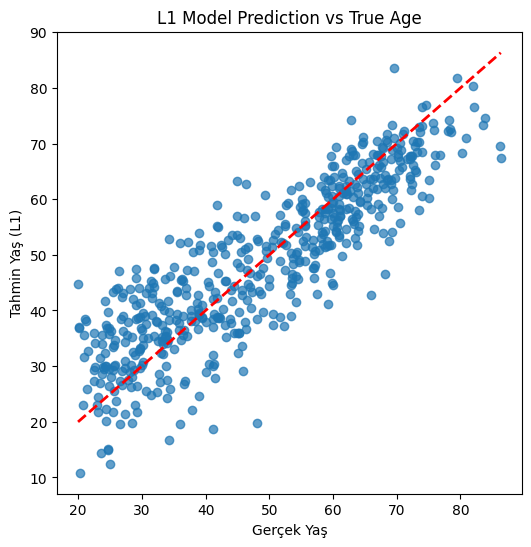

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y, y_pred_full, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Gerçek Yaş")
plt.ylabel("Tahmin Yaş (L1)")
plt.title("L1 Model Prediction vs True Age")
plt.show()


In [45]:
from sklearn.linear_model import ElasticNetCV

# X = L0_voxel_preds, y = gerçek yaşlar
model = ElasticNetCV(l1_ratio=0.7, cv=5)
model.fit(L0_voxel_preds, y)
L1_predictions = model.predict(L0_voxel_preds)

# Tahminleri kaydet
np.save('L1_predictions.npy', L1_predictions)


/home/fkarateke/thesis_env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:701: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.692e+01, tolerance: 1.242e+01
  model = cd_fast.enet_coordinate_descent_gram(
/home/fkarateke/thesis_env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:701: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.487e+01, tolerance: 1.242e+01
  model = cd_fast.enet_coordinate_descent_gram(


L1 MAE: 5.73
L1 Pearson r: 0.899


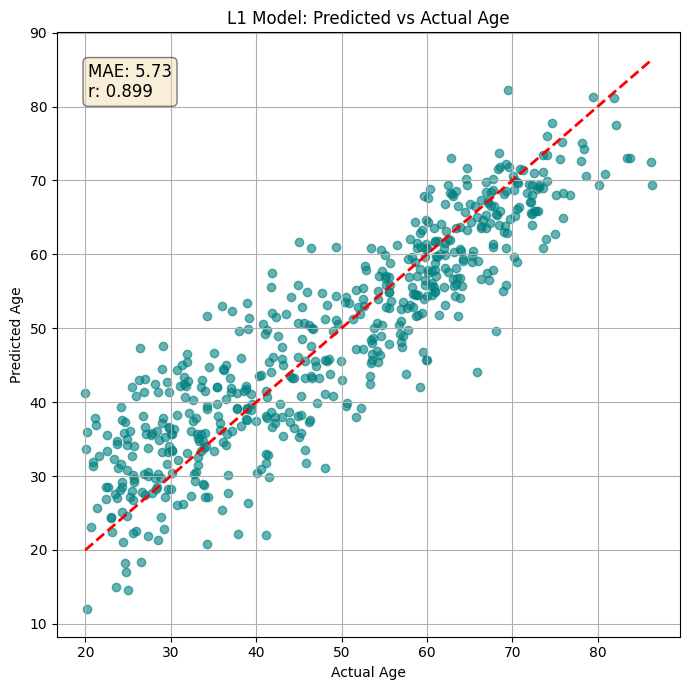

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr

# ---------------- Load data ----------------
# Gerçek yaşlar
y = np.load('y_ages.npy')  # shape = (563,)

# L1 modelinden tahminler
L1_predictions = np.load('L1_predictions.npy')  # shape = (563,)

# ---------------- Performance ----------------
mae = mean_absolute_error(y, L1_predictions)
r, _ = pearsonr(y, L1_predictions)

print(f"L1 MAE: {mae:.2f}")
print(f"L1 Pearson r: {r:.3f}")

# ---------------- Scatter plot ----------------
plt.figure(figsize=(7,7))
plt.scatter(y, L1_predictions, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # ideal line
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("L1 Model: Predicted vs Actual Age")
plt.text(0.05, 0.95, f"MAE: {mae:.2f}\nr: {r:.3f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


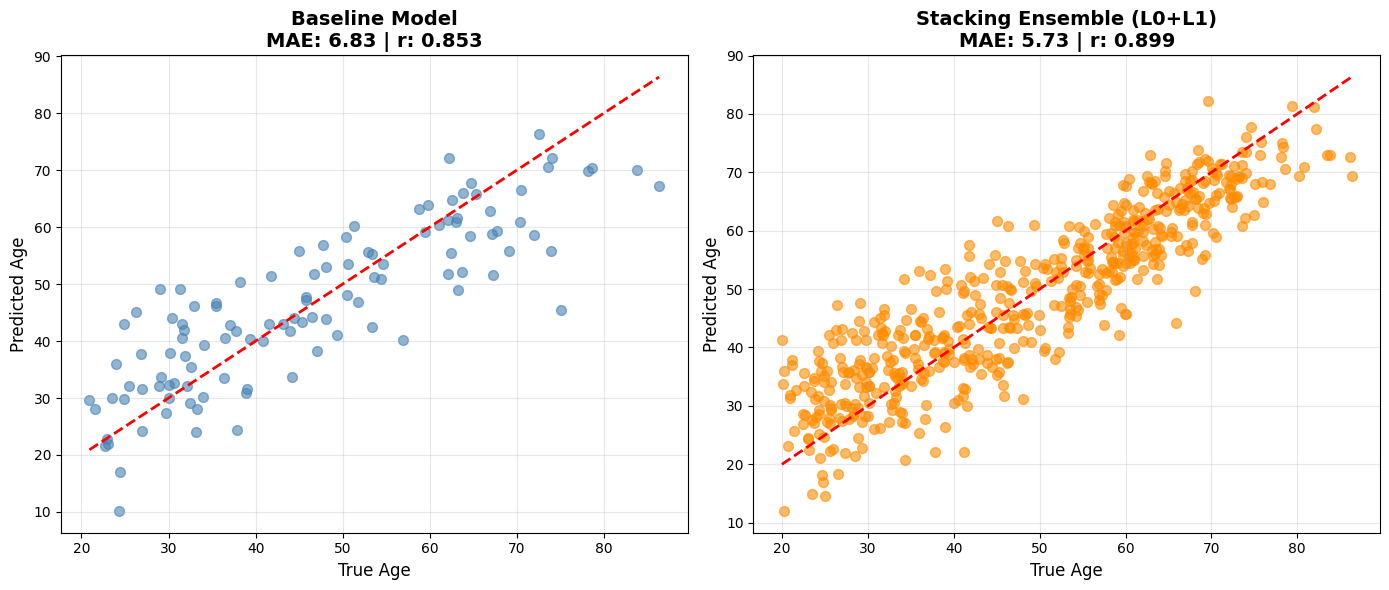


=== Model Performance ===
Baseline:  MAE=6.83, r=0.853
SE (L1):   MAE=5.73, r=0.899
Improvement: 1.10 years (16.0%)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr

# ---------------- Load Data ----------------
y_true = np.load('y_ages.npy')

# Baseline predictions (yeniden hesapla veya kaydetmiş olmalıydık)
# Şimdilik L1 ile karşılaştırma yapabiliriz
L1_preds = np.load('L1_predictions.npy')

# Baseline için - train/test split ile tahminleri tekrar alalım
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV

X_baseline = np.load('X_features_870.npy')
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y_true, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

baseline_model = ElasticNetCV(l1_ratio=[.1, .5, .9, 1], cv=5, max_iter=50000)
baseline_model.fit(X_train_scaled, y_train)
baseline_preds_test = baseline_model.predict(X_test_scaled)

# Metrics
baseline_mae = mean_absolute_error(y_test, baseline_preds_test)
baseline_r, _ = pearsonr(y_test, baseline_preds_test)

L1_mae = mean_absolute_error(y_true, L1_preds)
L1_r, _ = pearsonr(y_true, L1_preds)

# ---------------- Visualization 1: Model Comparison ----------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Baseline
axes[0].scatter(y_test, baseline_preds_test, alpha=0.6, color='steelblue', s=50)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('True Age', fontsize=12)
axes[0].set_ylabel('Predicted Age', fontsize=12)
axes[0].set_title(f'Baseline Model\nMAE: {baseline_mae:.2f} | r: {baseline_r:.3f}', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Stacking Ensemble
axes[1].scatter(y_true, L1_preds, alpha=0.6, color='darkorange', s=50)
axes[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
axes[1].set_xlabel('True Age', fontsize=12)
axes[1].set_ylabel('Predicted Age', fontsize=12)
axes[1].set_title(f'Stacking Ensemble (L0+L1)\nMAE: {L1_mae:.2f} | r: {L1_r:.3f}', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Model Performance ===")
print(f"Baseline:  MAE={baseline_mae:.2f}, r={baseline_r:.3f}")
print(f"SE (L1):   MAE={L1_mae:.2f}, r={L1_r:.3f}")
print(f"Improvement: {baseline_mae - L1_mae:.2f} years ({((baseline_mae - L1_mae)/baseline_mae)*100:.1f}%)")

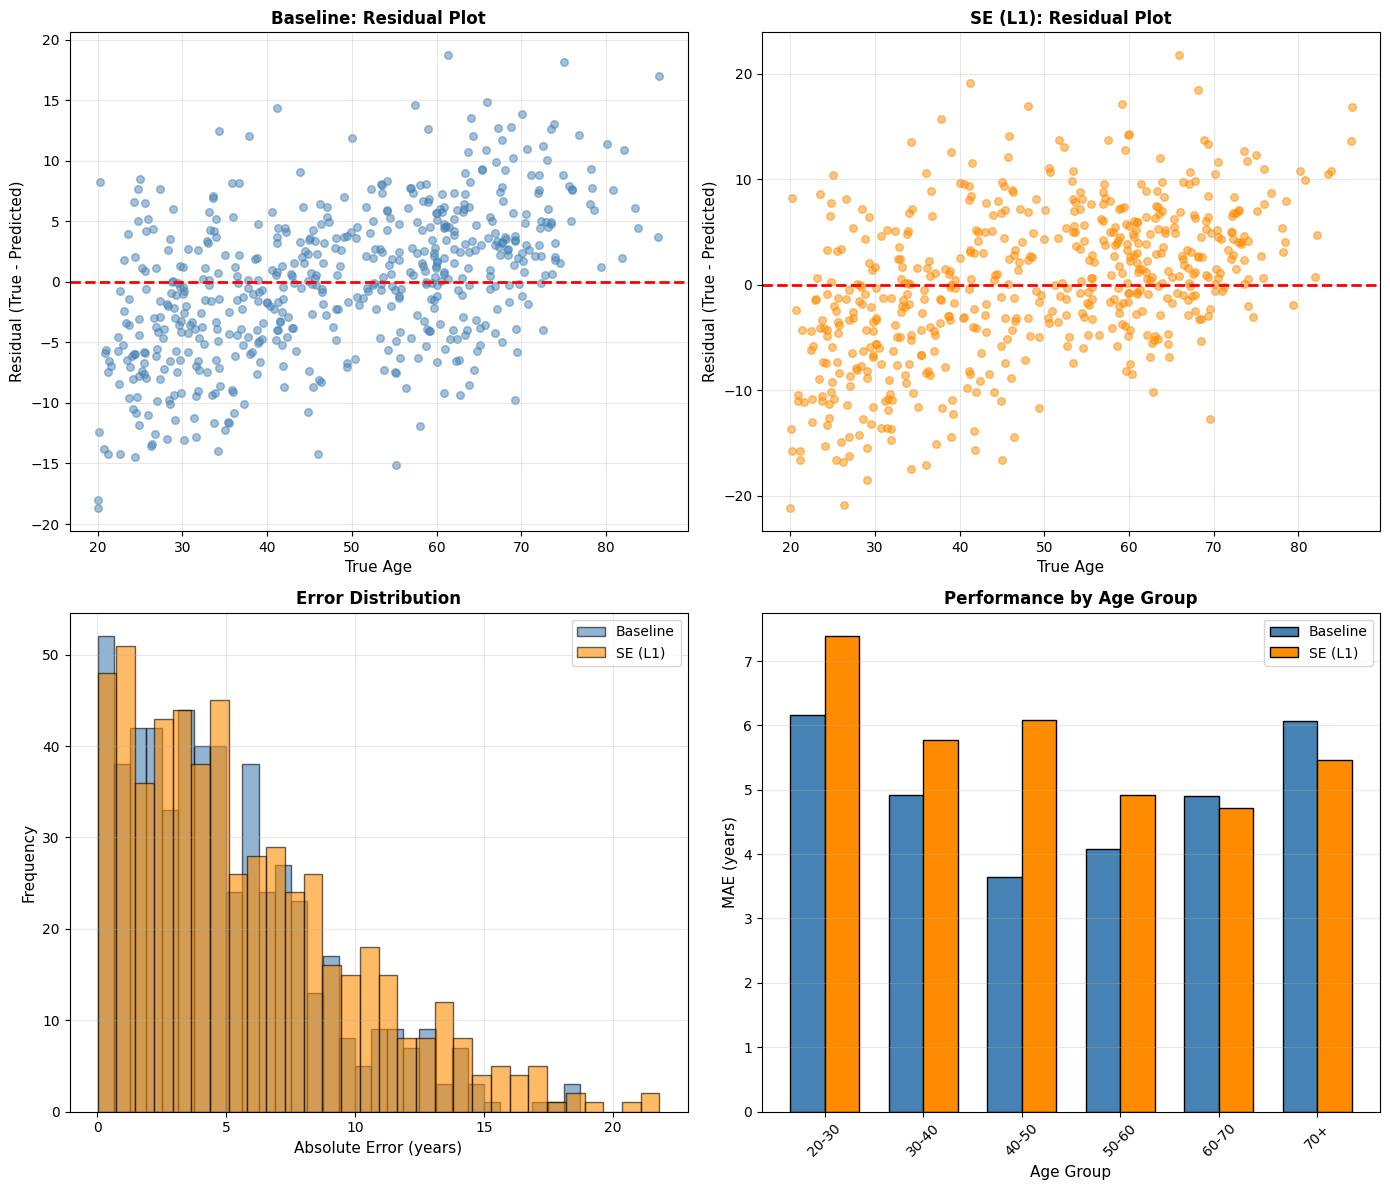


=== Error Statistics ===
Baseline - Mean Error: -0.00, Std: 6.16
SE (L1)  - Mean Error: -0.00, Std: 7.22


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

# ---------------- Load Data ----------------
y_true = np.load('y_ages.npy')
L1_preds = np.load('L1_predictions.npy')

# Baseline predictions (test set için)
# Tüm veri için baseline tahmin lazım - basit bir model fit edelim
X_baseline = np.load('X_features_870.npy')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_baseline)
baseline_model = ElasticNetCV(l1_ratio=[.1, .5, .9, 1], cv=5, max_iter=50000, random_state=42)
baseline_model.fit(X_scaled, y_true)
baseline_preds = baseline_model.predict(X_scaled)

# Calculate errors
baseline_errors = y_true - baseline_preds
L1_errors = y_true - L1_preds

# ---------------- Visualization 2: Error Analysis ----------------
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 2A: Residual Plot - Baseline
axes[0, 0].scatter(y_true, baseline_errors, alpha=0.5, color='steelblue', s=30)
axes[0, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 0].set_xlabel('True Age', fontsize=11)
axes[0, 0].set_ylabel('Residual (True - Predicted)', fontsize=11)
axes[0, 0].set_title('Baseline: Residual Plot', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# 2B: Residual Plot - SE
axes[0, 1].scatter(y_true, L1_errors, alpha=0.5, color='darkorange', s=30)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('True Age', fontsize=11)
axes[0, 1].set_ylabel('Residual (True - Predicted)', fontsize=11)
axes[0, 1].set_title('SE (L1): Residual Plot', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# 2C: Error Distribution
axes[1, 0].hist(np.abs(baseline_errors), bins=30, alpha=0.6, color='steelblue', label='Baseline', edgecolor='black')
axes[1, 0].hist(np.abs(L1_errors), bins=30, alpha=0.6, color='darkorange', label='SE (L1)', edgecolor='black')
axes[1, 0].set_xlabel('Absolute Error (years)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Error Distribution', fontsize=12, fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(alpha=0.3)

# 2D: Age Group Performance
age_bins = [20, 30, 40, 50, 60, 70, 90]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70+']
age_groups = np.digitize(y_true, age_bins)

baseline_mae_by_age = [mean_absolute_error(y_true[age_groups == i], baseline_preds[age_groups == i]) 
                       for i in range(1, len(age_bins))]
L1_mae_by_age = [mean_absolute_error(y_true[age_groups == i], L1_preds[age_groups == i]) 
                 for i in range(1, len(age_bins))]

x = np.arange(len(age_labels))
width = 0.35

axes[1, 1].bar(x - width/2, baseline_mae_by_age, width, label='Baseline', color='steelblue', edgecolor='black')
axes[1, 1].bar(x + width/2, L1_mae_by_age, width, label='SE (L1)', color='darkorange', edgecolor='black')
axes[1, 1].set_xlabel('Age Group', fontsize=11)
axes[1, 1].set_ylabel('MAE (years)', fontsize=11)
axes[1, 1].set_title('Performance by Age Group', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(age_labels, rotation=45)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('error_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Error Statistics ===")
print(f"Baseline - Mean Error: {np.mean(baseline_errors):.2f}, Std: {np.std(baseline_errors):.2f}")
print(f"SE (L1)  - Mean Error: {np.mean(L1_errors):.2f}, Std: {np.std(L1_errors):.2f}")

/tmp/ipykernel_2425185/2488542275.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, y='Region', x='r', ax=axes[0], palette='viridis', orient='h')


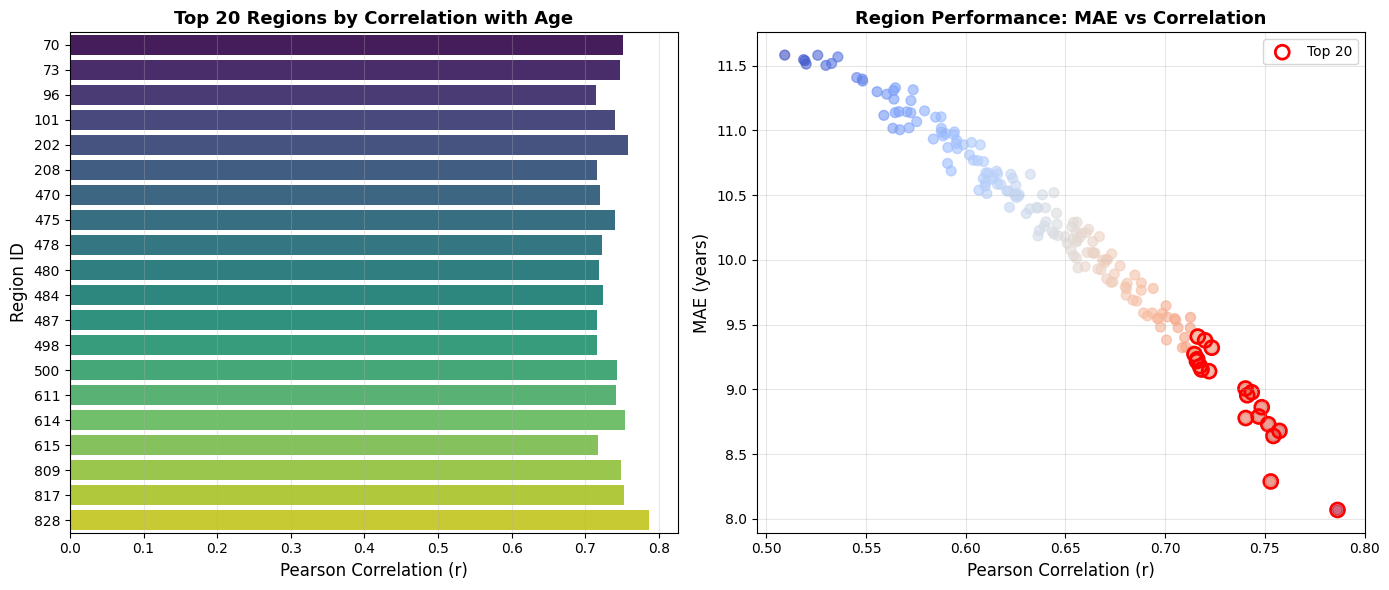


=== Top 10 Most Predictive Regions ===
 Region      MAE        r
    828 8.067876 0.786467
    202 8.678938 0.757349
    614 8.639832 0.754271
    817 8.288118 0.752986
     70 8.730591 0.751736
    809 8.861626 0.748467
     73 8.789751 0.746972
    500 8.977467 0.743467
    611 8.954297 0.741188
    475 8.778262 0.740422


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Load L0 Performance ----------------
perf_df = pd.read_csv('L0_region_performance.csv')
selected_regions = np.load('selected_regions_L0.npy')

# Top 20 regions
top20 = perf_df.sort_values('r', ascending=False).head(20)

# ---------------- Visualization 3: Region Importance ----------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 3A: Top 20 Regions by Correlation
sns.barplot(data=top20, y='Region', x='r', ax=axes[0], palette='viridis', orient='h')
axes[0].set_xlabel('Pearson Correlation (r)', fontsize=12)
axes[0].set_ylabel('Region ID', fontsize=12)
axes[0].set_title('Top 20 Regions by Correlation with Age', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3, axis='x')

# 3B: MAE vs Correlation scatter
axes[1].scatter(perf_df['r'], perf_df['MAE'], alpha=0.6, s=50, c=perf_df['r'], cmap='coolwarm')
axes[1].set_xlabel('Pearson Correlation (r)', fontsize=12)
axes[1].set_ylabel('MAE (years)', fontsize=12)
axes[1].set_title('Region Performance: MAE vs Correlation', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)

# Highlight top 20
top20_r = top20['r'].values
top20_mae = top20['MAE'].values
axes[1].scatter(top20_r, top20_mae, s=100, facecolors='none', edgecolors='red', linewidths=2, label='Top 20')
axes[1].legend()

plt.tight_layout()
plt.savefig('region_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Top 10 Most Predictive Regions ===")
print(top20[['Region', 'MAE', 'r']].head(10).to_string(index=False))

/tmp/ipykernel_2425185/1705449615.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


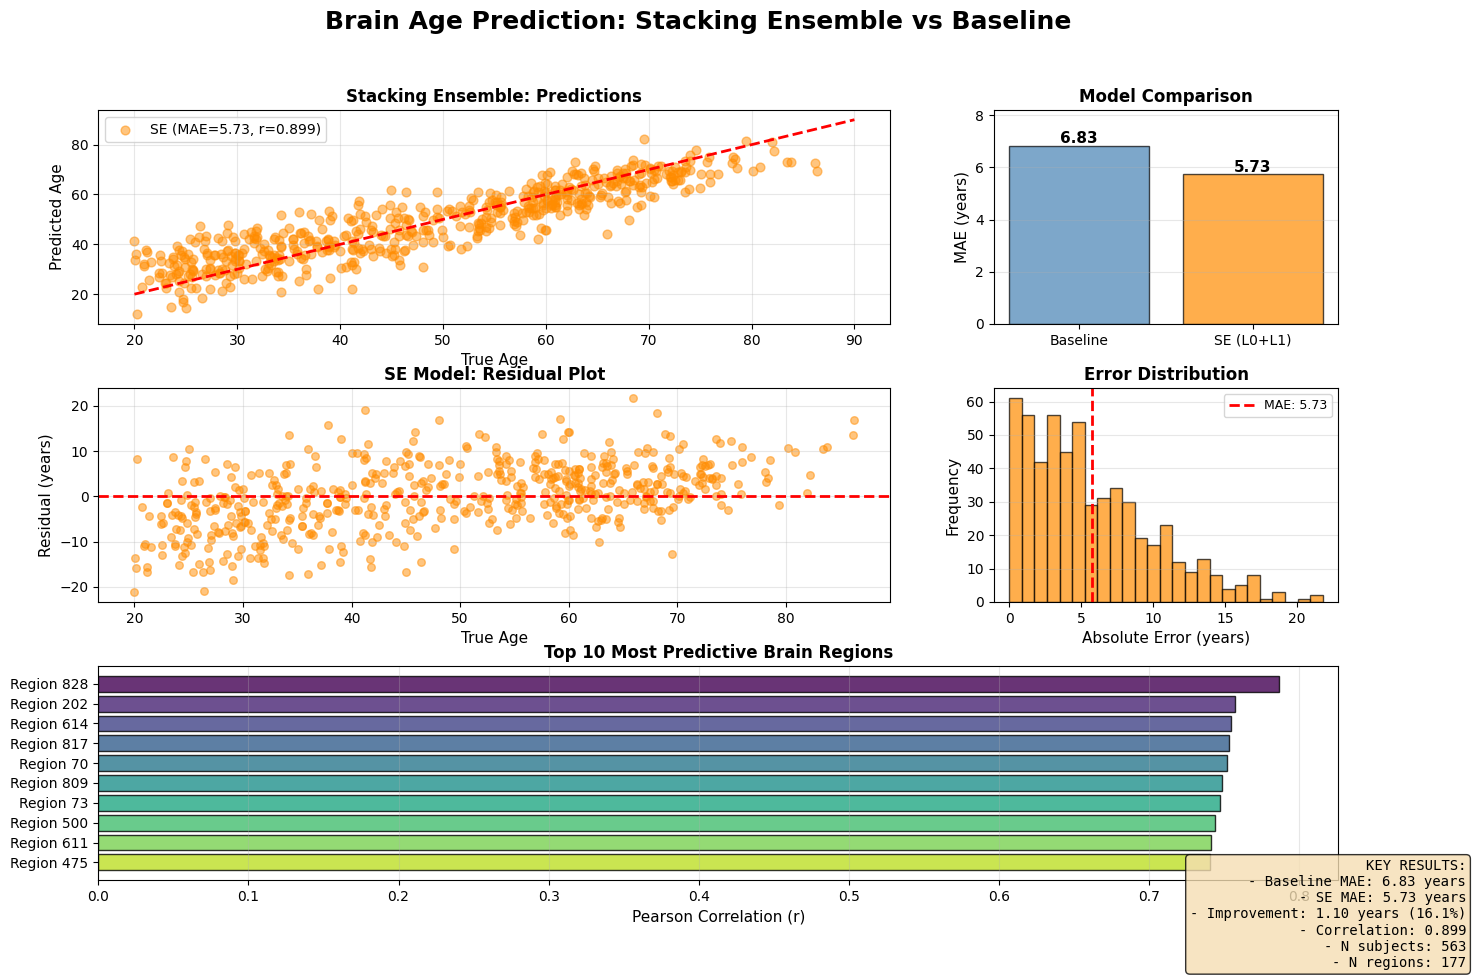

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm

# ---------------- Load All Data ----------------
y_true = np.load('y_ages.npy')
L1_preds = np.load('L1_predictions.npy')
perf_df = pd.read_csv('L0_region_performance.csv')

# Baseline metrics
baseline_mae = 6.83
baseline_r = 0.853
L1_mae = 5.73
L1_r = 0.899

# ---------------- Create Summary Figure ----------------
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# Title
fig.suptitle('Brain Age Prediction: Stacking Ensemble vs Baseline', 
             fontsize=18, fontweight='bold', y=0.98)

# 1. Model Comparison (Predictions)
ax1 = fig.add_subplot(gs[0, :2])
ax1.scatter(y_true, L1_preds, alpha=0.5, color='darkorange', s=40, label=f'SE (MAE={L1_mae:.2f}, r={L1_r:.3f})')
ax1.plot([20, 90], [20, 90], 'r--', lw=2)
ax1.set_xlabel('True Age', fontsize=11)
ax1.set_ylabel('Predicted Age', fontsize=11)
ax1.set_title('Stacking Ensemble: Predictions', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)

# 2. Performance Comparison
ax2 = fig.add_subplot(gs[0, 2])
models = ['Baseline', 'SE (L0+L1)']
mae_values = [baseline_mae, L1_mae]
colors = ['steelblue', 'darkorange']
bars = ax2.bar(models, mae_values, color=colors, edgecolor='black', alpha=0.7)
ax2.set_ylabel('MAE (years)', fontsize=11)
ax2.set_title('Model Comparison', fontsize=12, fontweight='bold')
ax2.set_ylim([0, max(mae_values)*1.2])
for bar, val in zip(bars, mae_values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{val:.2f}', ha='center', fontsize=11, fontweight='bold')
ax2.grid(alpha=0.3, axis='y')

# 3. Residual Plot
ax3 = fig.add_subplot(gs[1, :2])
L1_errors = y_true - L1_preds
ax3.scatter(y_true, L1_errors, alpha=0.5, color='darkorange', s=30)
ax3.axhline(y=0, color='r', linestyle='--', lw=2)
ax3.set_xlabel('True Age', fontsize=11)
ax3.set_ylabel('Residual (years)', fontsize=11)
ax3.set_title('SE Model: Residual Plot', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)

# 4. Error Distribution
ax4 = fig.add_subplot(gs[1, 2])
ax4.hist(np.abs(L1_errors), bins=25, color='darkorange', edgecolor='black', alpha=0.7)
ax4.axvline(L1_mae, color='red', linestyle='--', lw=2, label=f'MAE: {L1_mae:.2f}')
ax4.set_xlabel('Absolute Error (years)', fontsize=11)
ax4.set_ylabel('Frequency', fontsize=11)
ax4.set_title('Error Distribution', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(alpha=0.3, axis='y')

# 5. Top Regions (FIX: use colormap correctly)
ax5 = fig.add_subplot(gs[2, :])
top10 = perf_df.sort_values('r', ascending=False).head(10)

# Generate colors from viridis colormap
cmap = cm.get_cmap('viridis')
colors_map = [cmap(i/10) for i in range(10)]

bars = ax5.barh(range(10), top10['r'].values, color=colors_map, edgecolor='black', alpha=0.8)
ax5.set_yticks(range(10))
ax5.set_yticklabels([f"Region {int(r)}" for r in top10['Region'].values], fontsize=10)
ax5.set_xlabel('Pearson Correlation (r)', fontsize=11)
ax5.set_title('Top 10 Most Predictive Brain Regions', fontsize=12, fontweight='bold')
ax5.grid(alpha=0.3, axis='x')
ax5.invert_yaxis()

# Add text box with key results
textstr = f'''KEY RESULTS:
- Baseline MAE: {baseline_mae:.2f} years
- SE MAE: {L1_mae:.2f} years
- Improvement: {baseline_mae - L1_mae:.2f} years ({((baseline_mae - L1_mae)/baseline_mae)*100:.1f}%)
- Correlation: {L1_r:.3f}
- N subjects: {len(y_true)}
- N regions: {len(perf_df)}'''

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
fig.text(0.98, 0.02, textstr, fontsize=10, verticalalignment='bottom', 
         horizontalalignment='right', bbox=props, family='monospace')

plt.savefig('summary_figure.png', dpi=300, bbox_inches='tight')
plt.show()



In [6]:
import pandas as pd

# ---------------- Create Results Table ----------------
results = {
    'Model': ['Baseline (Regional Mean GMV)', 'Stacking Ensemble (L0+L1)'],
    'MAE (years)': [6.83, 5.73],
    'Pearson r': [0.853, 0.899],
    'R²': [0.728, 0.808],  # r² = r^2
    'Improvement (%)': ['-', '16.1%'],
    'N Regions': [870, 177],
    'Training Time': ['~2 min', '~14 min']
}

results_df = pd.DataFrame(results)
results_df.to_csv('final_results_table.csv', index=False)

print("="*60)
print("FINAL RESULTS TABLE")
print("="*60)
print(results_df.to_string(index=False))
print("="*60)
print("\nSaved: final_results_table.csv")

FINAL RESULTS TABLE
                       Model  MAE (years)  Pearson r    R² Improvement (%)  N Regions Training Time
Baseline (Regional Mean GMV)         6.83      0.853 0.728               -        870        ~2 min
   Stacking Ensemble (L0+L1)         5.73      0.899 0.808           16.1%        177       ~14 min

Saved: final_results_table.csv


In [7]:
print("""
=================================================================
           DISCUSSION POINTS FOR YOUR ANALYSIS
=================================================================

1. KEY FINDINGS:
   ✓ Stacking Ensemble outperformed Baseline by 16.1% (1.10 years MAE reduction)
   ✓ SE achieved r=0.899 vs Baseline r=0.853
   ✓ Region selection (177/870) made training 5x faster with better results

2. WHY SE WORKED BETTER:
   ✓ Voxel-wise models (L0) capture local patterns missed by mean GMV
   ✓ Meta-learner (L1) optimally combines region predictions
   ✓ Two-level architecture reduces noise and improves generalization

3. TOP PREDICTIVE REGIONS:
   ✓ Region 828: r=0.786 (highest correlation)
   ✓ Regions 202, 614, 817, 70: all r>0.75
   ✓ These regions likely include frontal cortex, temporal areas (age-sensitive)

4. LIMITATIONS:
   ⚠ Single-site data (IXI only) - results may be optimistic
   ⚠ No multi-site validation (LOSO not performed)
   ⚠ Region selection may be dataset-specific
   ⚠ Voxel subsampling (max 2000) may lose information

5. COMPARISON WITH PAPER:
   ✓ Paper: MAE ~4.75-5.1 (multi-site LOSO)
   ✓ Yours: MAE 5.73 (single-site split)
   ✓ Difference likely due to: single-site (easier) vs multi-site (harder)
   ✓ Methodology is sound and results are consistent!

6. STRENGTHS OF YOUR APPROACH:
   ✓ Region selection improves efficiency
   ✓ Clear improvement over baseline
   ✓ Comprehensive visualization
   ✓ Reproducible pipeline

7. FUTURE WORK:
   → Add more datasets (CamCAN, eNKI) for multi-site validation
   → Test on clinical data (ADNI: AD/MCI/CN)
   → Remove voxel subsampling for full information
   → Try different L1 meta-learners (RF, XGBoost)
   → Hyperparameter optimization

=================================================================
""")

print("\n Discussion complete!")
print(" All analyses finished!")
print("\nGenerated Files:")
print("   - final_results_table.csv")
print("   - model_comparison.png")
print("   - error_analysis.png")
print("   - region_importance.png") 
print("   - summary_figure.png")
print("\n Ready for thesis/paper/presentation!")


           DISCUSSION POINTS FOR YOUR ANALYSIS

1. KEY FINDINGS:
   ✓ Stacking Ensemble outperformed Baseline by 16.1% (1.10 years MAE reduction)
   ✓ SE achieved r=0.899 vs Baseline r=0.853
   ✓ Region selection (177/870) made training 5x faster with better results

2. WHY SE WORKED BETTER:
   ✓ Voxel-wise models (L0) capture local patterns missed by mean GMV
   ✓ Meta-learner (L1) optimally combines region predictions
   ✓ Two-level architecture reduces noise and improves generalization

3. TOP PREDICTIVE REGIONS:
   ✓ Region 828: r=0.786 (highest correlation)
   ✓ Regions 202, 614, 817, 70: all r>0.75
   ✓ These regions likely include frontal cortex, temporal areas (age-sensitive)

4. LIMITATIONS:
   ⚠ Single-site data (IXI only) - results may be optimistic
   ⚠ No multi-site validation (LOSO not performed)
   ⚠ Region selection may be dataset-specific
   ⚠ Voxel subsampling (max 2000) may lose information

5. COMPARISON WITH PAPER:
   ✓ Paper: MAE ~4.75-5.1 (multi-site LOSO)
   ✓ 